In [3]:
pwd

'/home/wsuser/work'

In [4]:
!pip install keras==2.2.4

In [5]:
!pip install tensorflow==2.5.0

     |████████████████████████████████| 454.4 MB 39 kB/s s eta 0:00:01MB 18.2 MB/s eta 0:00:252424 |████▌                           | 64.3 MB 18.2 MB/s eta 0:00:22
     |████████████████████████████████| 4.4 MB 73.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.9 MB 29.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 76.8 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 81.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 82.5 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-exten

In [7]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='fGEMPVPPQY-IpcMKy9r8tjxlGj319zThTRoQcjRhQkKc',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'aipowerednutritionanalyzerforfitn-donotdelete-pr-abrmhfbqmreclr'
object_key = 'DATASETS.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [8]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)


In [9]:
ls

Dataset1/


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [13]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
x_train = train_datagen.flow_from_directory("/home/wsuser/work/Dataset1/TRAIN_SET",
                                            target_size=(64, 64),
                                            batch_size=3,
                                            color_mode='rgb',
                                            class_mode='categorical')

Found 4118 images belonging to 5 classes.


In [15]:
x_test = test_datagen.flow_from_directory("/home/wsuser/work/Dataset1/TEST_SET",
                                          target_size=(64, 64),
                                          batch_size=3,
                                          color_mode='rgb',
                                          class_mode='categorical')

Found 1679 images belonging to 5 classes.


In [16]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [21]:
model=Sequential()

In [22]:
model.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

In [23]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
model.add(Flatten())

In [25]:
model.add(Dense(units=128,activation='relu',kernel_initializer ='random_uniform'))


In [26]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer ='random_uniform'))


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 410,753
Trainable params: 410,753
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [29]:
len(x_train)


1373

In [30]:
model.fit(x_train,steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test), epochs= 25)


Epoch 1/25
1373/1373 [==============================] - 11s 8ms/step - loss: 0.5019 - accuracy: 0.7997 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 2/25
1373/1373 [==============================] - 11s 8ms/step - loss: 0.5005 - accuracy: 0.8000 - val_loss: 0.5005 - val_accuracy: 0.8000
Epoch 3/25
1373/1373 [==============================] - 11s 8ms/step - loss: 0.5005 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 4/25
1373/1373 [==============================] - 11s 8ms/step - loss: 0.5005 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 5/25
1373/1373 [==============================] - 10s 8ms/step - loss: 0.5004 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 6/25
1373/1373 [==============================] - 11s 8ms/step - loss: 0.5004 - accuracy: 0.8000 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 7/25
1373/1373 [==============================] - 11s 8ms/step - loss: 0.5004 - accuracy: 0.8000 - val_loss: 0.5004 - val_ac

In [31]:
model.save('mymodel.h5')

In [32]:
ls

Dataset1/  mymodel.h5


In [33]:
cd Dataset1

/home/wsuser/work/Dataset1


In [34]:
model.save('mymodel.h5')

In [35]:
ls

IBM_review.pptx  mymodel.h5  TEST_SET/  TRAIN_SET/


In [40]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [41]:
model = load_model('mymodel.h5')

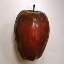

In [55]:
img=image.load_img(r"/home/wsuser/work/Dataset1/TEST_SET/APPLES/n07740461_20.jpg",grayscale=False,target_size=(64,64))
img

In [59]:
x= image.img_to_array(img)
x =np.expand_dims(x,axis= 0)
pred =np.argmax(model.predict(x),axis=1)
pred

array([0])

In [60]:
x_train.class_indices

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}

In [61]:
index= ['APPLE','BANANA','ORANGE','PINEAPPLE','WATERMELON'] 

In [62]:
index[pred[0]]

'APPLE'

In [63]:
!tar -zcvf nutrition-model.tgz mymodel.h5

mymodel.h5


In [64]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [65]:
!pip install watson-machine-learning-client

     |████████████████████████████████| 538 kB 23.5 MB/s eta 0:00:01


In [67]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"JmljsAGRtavsQFxun8wZ3-IYeasMrcYL55NZxJKIRYZD"
}

client=APIClient(wml_credentials)

In [68]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------  ------------------------
ID                                    NAME           CREATED
df95cd49-5e7c-446c-99bf-116822b51ddd  ibm_ntproject  2022-11-04T04:45:30.304Z
------------------------------------  -------------  ------------------------


In [69]:
client.set.default_space("df95cd49-5e7c-446c-99bf-116822b51ddd")

'SUCCESS'

In [70]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [71]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [72]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [74]:
model_details=client.repository.store_model(model='nutrition-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Model Building",
    client.repository.ModelMetaNames.TYPE:'tensorflow_2.7',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [76]:
model_id=client.repository.get_model_id(model_details)

In [77]:
model_id

'64b22bbf-c01d-4532-bb66-1332bf04d25a'

In [78]:
client.repository.download(model_id,'nutrition.tar.gb')

Successfully saved model content to file: 'nutrition.tar.gb'


'/home/wsuser/work/Dataset1/nutrition.tar.gb'

In [ ]:
ls

IBM_review.pptx  nutrition-model.tgz  TEST_SET/
mymodel.h5       nutrition.tar.gb     TRAIN_SET/
